In [1]:
"""
AI test code
"""
#library imports 
import torch
import torchvision
import torch.nn as nn

#imports to plot data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#stopwatch for process time
import time

#Gloabl Parameter
num_classes = 10


In [2]:
#Cuda check
#torch.cuda.is_available()
PC = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(PC)

cuda:0


In [3]:
"""
Build neural network

"""

# CNN, 2 conv laters , 2 fuly connected layers
class HW4Net(nn.Module):
    def __init__(self, num_classes=10):
        super(HW4Net, self).__init__()
        #input shape from dataset: 1x28x28
        #layer 1 10 5x5 kernal
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 10, kernel_size=5, stride=1, padding=2), #output shape 10,28,28
            nn.BatchNorm2d(10),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)) #output shape: 10,14,14
        #input shape 10x14x14
        #layer 2 20 5x5 kernals
        self.layer2 = nn.Sequential(
            nn.Conv2d(10, 20, kernel_size=5, stride=1, padding=2), #output shape: 20,14,14
            nn.BatchNorm2d(20),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)) #output shape 20,7,7
        #full connected layer 1 50neu
        self.fc1 = nn.Linear(7*7*20, 50)
        self.relu = nn.ReLU()
         #full connected layer 2 10neu
        self.fc2 = nn.Linear(50, 10) #hidden layer, num_classes 
    #need inout and output shapes updated
    def forward(self, x):
        # input shape: (None,1,28,28)
        out = self.layer1(x) #output shape: (None,10,14,14)
        out = self.layer2(out) #output shape: (None,20,7,7)
        out = out.reshape(out.size(0), -1) #output shape: (None,20*7*7)
        out = self.fc1(out) #output shape: (None,10)
        out = self.fc2(out) #output shape: (None,10)
        return out

model = HW4Net(num_classes).to(PC)  

In [4]:
"""
calcualte accuracy of model
"""
#Test Model function
def Accurate(model):
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_loader:
            images = images.to(PC)
            labels = labels.to(PC)
            outputs = model(images)
            #Tensor.data: tensor
            _, predicted = torch.max(outputs.data, 1)
            #Tensor.size(): torch.Size, Tensor.size(0): int
            total += labels.size(0)
            #Tensor.item(): number
            correct += (predicted == labels).sum().item()       
    return '{}'.format(100 * correct / total)

Epoch [1/10], Step [40/1200], Loss: 1.3252
Epoch [1/10], Step [80/1200], Loss: 0.3922
Epoch [1/10], Step [120/1200], Loss: 0.4500
Epoch [1/10], Step [160/1200], Loss: 0.1483
Epoch [1/10], Step [200/1200], Loss: 0.2078
Epoch [1/10], Step [240/1200], Loss: 0.3135
Epoch [1/10], Step [280/1200], Loss: 0.3369
Epoch [1/10], Step [320/1200], Loss: 0.5056
Epoch [1/10], Step [360/1200], Loss: 0.0705
Epoch [1/10], Step [400/1200], Loss: 0.1782
Epoch [1/10], Step [440/1200], Loss: 0.0609
Epoch [1/10], Step [480/1200], Loss: 0.0564
Epoch [1/10], Step [520/1200], Loss: 0.0849
Epoch [1/10], Step [560/1200], Loss: 0.1384
Epoch [1/10], Step [600/1200], Loss: 0.3472
Epoch [1/10], Step [640/1200], Loss: 0.0913
Epoch [1/10], Step [680/1200], Loss: 0.0894
Epoch [1/10], Step [720/1200], Loss: 0.0304
Epoch [1/10], Step [760/1200], Loss: 0.0267
Epoch [1/10], Step [800/1200], Loss: 0.0941
Epoch [1/10], Step [840/1200], Loss: 0.0465
Epoch [1/10], Step [880/1200], Loss: 0.0660
Epoch [1/10], Step [920/1200], Los

Epoch [7/10], Step [280/1200], Loss: 0.0321
Epoch [7/10], Step [320/1200], Loss: 0.0210
Epoch [7/10], Step [360/1200], Loss: 0.0031
Epoch [7/10], Step [400/1200], Loss: 0.1137
Epoch [7/10], Step [440/1200], Loss: 0.0706
Epoch [7/10], Step [480/1200], Loss: 0.1130
Epoch [7/10], Step [520/1200], Loss: 0.0052
Epoch [7/10], Step [560/1200], Loss: 0.1352
Epoch [7/10], Step [600/1200], Loss: 0.0302
Epoch [7/10], Step [640/1200], Loss: 0.0018
Epoch [7/10], Step [680/1200], Loss: 0.0049
Epoch [7/10], Step [720/1200], Loss: 0.0094
Epoch [7/10], Step [760/1200], Loss: 0.0099
Epoch [7/10], Step [800/1200], Loss: 0.1412
Epoch [7/10], Step [840/1200], Loss: 0.0198
Epoch [7/10], Step [880/1200], Loss: 0.1337
Epoch [7/10], Step [920/1200], Loss: 0.0372
Epoch [7/10], Step [960/1200], Loss: 0.0015
Epoch [7/10], Step [1000/1200], Loss: 0.0393
Epoch [7/10], Step [1040/1200], Loss: 0.0070
Epoch [7/10], Step [1080/1200], Loss: 0.0332
Epoch [7/10], Step [1120/1200], Loss: 0.0586
Epoch [7/10], Step [1160/120

C:\Users\Admin\AppData\Local\Temp\ipykernel_13680\762058522.py:63: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot( 'x', 'y', "", data=df, linestyle='', marker='o', markersize=0.7)


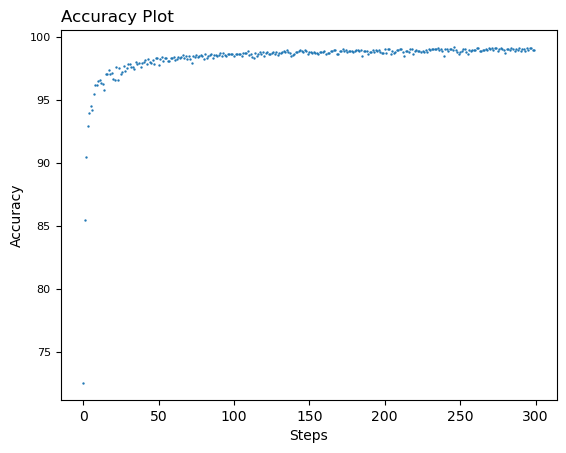

C:\Users\Admin\AppData\Local\Temp\ipykernel_13680\762058522.py:72: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot( 'x', 'y', "", data=df, linestyle='', marker='o', markersize=0.7)


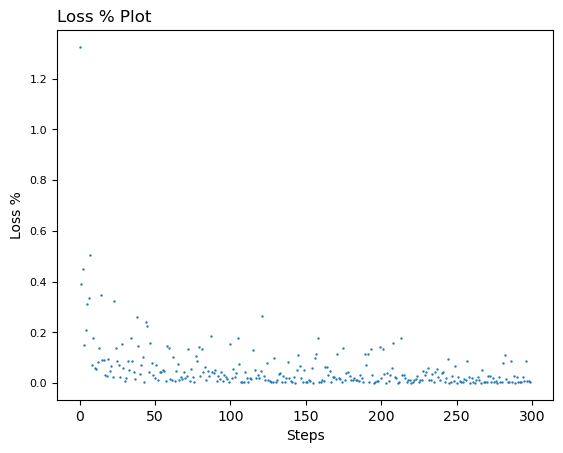

In [5]:
"""
basic test run
RTX 3070 GPU = 457.37sec/60=7.62min
Tesla T4 GPU = 465.05 sec/60 = 7.75min
AMD Z1 CPU = 917sec/60 = 15.26min
RTX 3090 GPU = ???
"""
#Hype Par
num_epochs = 10
learning_rate = 0.01
batch = 50

#data import
train_loader=torch.utils.data.DataLoader(torchvision.datasets.MNIST('./data',train=True,download=True,transform=torchvision.transforms.ToTensor()),batch_size=batch,shuffle=True)
test_loader=torch.utils.data.DataLoader(torchvision.datasets.MNIST('./data',train=False,download=True,transform=torchvision.transforms.ToTensor()),batch_size=batch,shuffle=True)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
#https://pytorch.org/docs/stable/optim.html
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

#Subplot to fill
X=[]
Y=[]

#start timer
start = time.time()

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):

    for i, (images, labels) in enumerate(train_loader):
        images = images.to(PC)
        labels = labels.to(PC)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 40 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
            Y.append(float(Accurate(model)))  
            X.append(float('{:.4f}'.format(loss.item())))
            
#stop timer
end = time.time()
# elapsed time
elapsed_time = end - start
print('Process time: ', elapsed_time, 'seconds')

#Plots
StepList = [*range(0, len(X), 1)]
#plot 1
df=pd.DataFrame({'x': StepList, 'y': Y })
plt.yticks(fontsize=8)
plt.plot( 'x', 'y', "", data=df, linestyle='', marker='o', markersize=0.7)
plt.xlabel('Steps')
plt.ylabel('Accuracy')
plt.title('Accuracy Plot', loc='left')
plt.show()

#plot 2
df=pd.DataFrame({'x': StepList, 'y': X })
plt.yticks(fontsize=8)
plt.plot( 'x', 'y', "", data=df, linestyle='', marker='o', markersize=0.7)
plt.xlabel('Steps')
plt.ylabel('Loss %')
plt.title('Loss % Plot', loc='left')
plt.show()

Epoch [1/10], Step [2000/60000], Loss: 3.1573
Epoch [1/10], Step [4000/60000], Loss: 0.0011
Epoch [1/10], Step [6000/60000], Loss: 0.0179
Epoch [1/10], Step [8000/60000], Loss: 4.3278
Epoch [1/10], Step [10000/60000], Loss: 0.0000
Epoch [1/10], Step [12000/60000], Loss: 0.3545
Epoch [1/10], Step [14000/60000], Loss: 0.0610
Epoch [1/10], Step [16000/60000], Loss: 0.0000
Epoch [1/10], Step [18000/60000], Loss: 0.0404
Epoch [1/10], Step [20000/60000], Loss: 0.0084
Epoch [1/10], Step [22000/60000], Loss: 0.1834
Epoch [1/10], Step [24000/60000], Loss: 0.7267
Epoch [1/10], Step [26000/60000], Loss: 0.0509
Epoch [1/10], Step [28000/60000], Loss: 0.0264
Epoch [1/10], Step [30000/60000], Loss: 0.0005
Epoch [1/10], Step [32000/60000], Loss: 0.0023
Epoch [1/10], Step [34000/60000], Loss: 0.0007
Epoch [1/10], Step [36000/60000], Loss: 0.0023
Epoch [1/10], Step [38000/60000], Loss: 0.0001
Epoch [1/10], Step [40000/60000], Loss: 0.0000
Epoch [1/10], Step [42000/60000], Loss: 0.0034
Epoch [1/10], Ste

Epoch [6/10], Step [52000/60000], Loss: 0.0000
Epoch [6/10], Step [54000/60000], Loss: 0.1270
Epoch [6/10], Step [56000/60000], Loss: 0.0000
Epoch [6/10], Step [58000/60000], Loss: 0.2190
Epoch [6/10], Step [60000/60000], Loss: 0.0719
Epoch [7/10], Step [2000/60000], Loss: 0.0000
Epoch [7/10], Step [4000/60000], Loss: 0.0431
Epoch [7/10], Step [6000/60000], Loss: 0.0000
Epoch [7/10], Step [8000/60000], Loss: 0.5126
Epoch [7/10], Step [10000/60000], Loss: 0.0000
Epoch [7/10], Step [12000/60000], Loss: 0.0065
Epoch [7/10], Step [14000/60000], Loss: 0.0005
Epoch [7/10], Step [16000/60000], Loss: 0.0000
Epoch [7/10], Step [18000/60000], Loss: 0.0012
Epoch [7/10], Step [20000/60000], Loss: 0.0087
Epoch [7/10], Step [22000/60000], Loss: 0.0270
Epoch [7/10], Step [24000/60000], Loss: 1.0503
Epoch [7/10], Step [26000/60000], Loss: 1.4597
Epoch [7/10], Step [28000/60000], Loss: 0.0009
Epoch [7/10], Step [30000/60000], Loss: 0.0000
Epoch [7/10], Step [32000/60000], Loss: 0.0187
Epoch [7/10], Ste

C:\Users\Admin\AppData\Local\Temp\ipykernel_2964\2528920085.py:60: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot( 'x', 'y', "", data=df, linestyle='', marker='o', markersize=0.7)


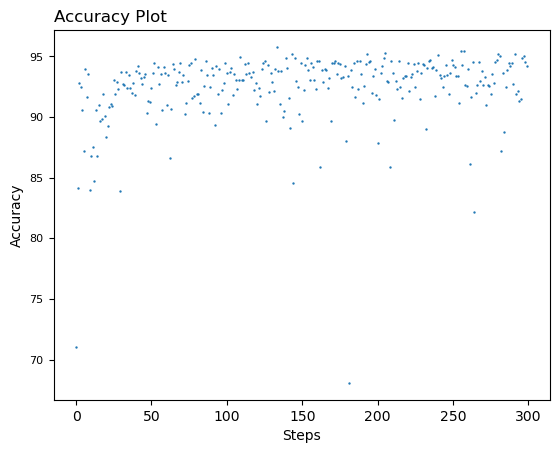

C:\Users\Admin\AppData\Local\Temp\ipykernel_2964\2528920085.py:69: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot( 'x', 'y', "", data=df, linestyle='', marker='o', markersize=0.7)


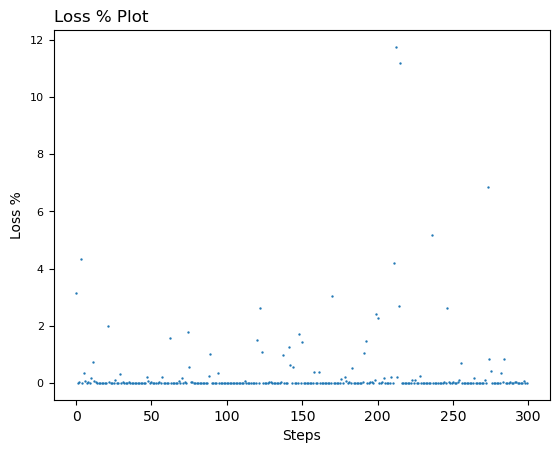

In [5]:
"""
Complex Test
RTX 3070 = 4226.35 seconds/60 =70.43min
Tesla T4 = 5028.55 seconds/60 = 83.80min
RTX 3090 GPU = ???

"""
#Hype Par
num_epochs = 10
learning_rate = 0.01
batch = 1

#data import
train_loader=torch.utils.data.DataLoader(torchvision.datasets.MNIST('./data',train=True,download=True,transform=torchvision.transforms.ToTensor()),batch_size=batch,shuffle=True)
test_loader=torch.utils.data.DataLoader(torchvision.datasets.MNIST('./data',train=False,download=True,transform=torchvision.transforms.ToTensor()),batch_size=batch,shuffle=True)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
#https://pytorch.org/docs/stable/optim.html
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

#Subplot to fill
X=[]
Y=[]
#start timer
start = time.time()

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):

    for i, (images, labels) in enumerate(train_loader):
        images = images.to(PC)
        labels = labels.to(PC)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        #modified for 2000 images at batch size 1
        if (i+1) % 2000 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
            Y.append(float(Accurate(model)))    
            X.append(float('{:.4f}'.format(loss.item())))
            
#stop timer
end = time.time()
# elapsed time
elapsed_time = end - start
print('Process time: ', elapsed_time, 'seconds')

#Plots
StepList = [*range(0, len(X), 1)]
#plot 1
df=pd.DataFrame({'x': StepList, 'y': Y })
plt.yticks(fontsize=8)
plt.plot( 'x', 'y', "", data=df, linestyle='', marker='o', markersize=0.7)
plt.xlabel('Steps')
plt.ylabel('Accuracy')
plt.title('Accuracy Plot', loc='left')
plt.show()

#plot 2
df=pd.DataFrame({'x': StepList, 'y': X })
plt.yticks(fontsize=8)
plt.plot( 'x', 'y', "", data=df, linestyle='', marker='o', markersize=0.7)
plt.xlabel('Steps')
plt.ylabel('Loss %')
plt.title('Loss % Plot', loc='left')
plt.show() 